In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyplot_themes
import seaborn as sns
%matplotlib inline

In [36]:
pyplot_themes.theme_ucberkeley()
blue_yellow = pyplot_themes.palettes.UCBerkeley.primary_colors[::2]


## Comparing Critics and Audience Scores on Rotten Tomatoes

I _feel like_ I've noticed that audience scores tend to be higher for movies that are fun to watch, while critics scores tend to be higher for movies that are challenging to watch. I also _feel like_ more fun to watch movies end up doing better at the box office while more challenging movies end up getting more acclaim come awards season. Even better than _feeling_ this way, I can compare the scores from RottenTomatoes pretty easily.

I started by extracting the list of top box office hits and Academy Award Best Picture nominations for the 2010s decade from Wikipedia. I then tried to extract the Tomamoter (critic) and Audience scores from rottentomatoes.com using a _"url-friendly"_ version of the title. For example, the film _La La Land_ would be tried as `la_la_land`. If that didn't work, I would then try adding the year to the title like `la_la_land_2016`. One of these two options usually worked. I looked into the others that did not match easily, but decided there was no good way to automate them so filled in by hand.

In [21]:
movies = pd.read_csv("movies_2010s.csv")

In [22]:
movies.sample(10)

,title,year,type,critics_score,audience_score
6,Iron Man 2,2010,top_ten_box_office_hit,73,71
159,Call Me by Your Name,2017,oscar_nomination,95,86
38,Man of Steel,2013,top_ten_box_office_hit,56,75
17,The Hangover Part II,2011,top_ten_box_office_hit,33,52
0,Toy Story 3,2010,both,98,89
85,Bohemian Rhapsody,2018,both,61,86
107,Winter's Bone,2010,oscar_nomination,94,76
56,Inside Out,2015,top_ten_box_office_hit,98,89
92,Spider-Man: Far From Home,2019,top_ten_box_office_hit,90,95
35,Fast & Furious 6,2013,top_ten_box_office_hit,70,84


In [23]:
print(
    f"There are {movies.shape[0]} movies in this dataset,",
    f"but {movies[['critics_score', 'audience_score']].isna().sum()[0]} of them don't have their scores.",
    sep = "\n",
)

There are 173 movies in this dataset,
but 0 of them don't have their scores.


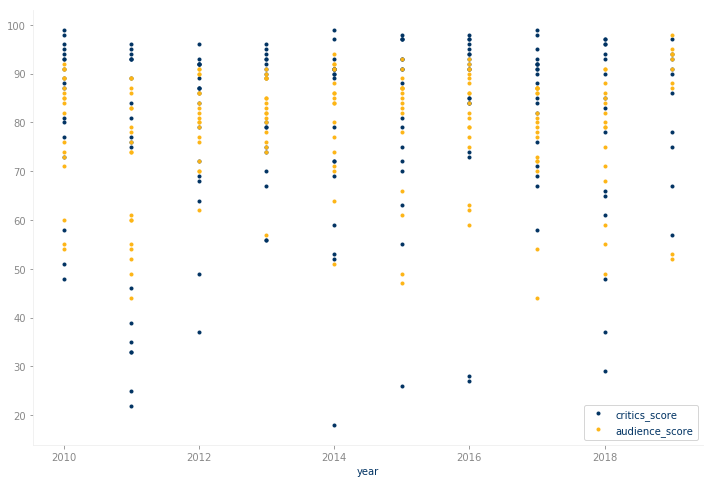

In [38]:
movies.plot(
    x="year",
    y=["critics_score", "audience_score"], 
    style=".",
    color=blue_yellow,
)

There does seem to be a bit of disagreement, but I can't tell right away much it differs.

/home/rucy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


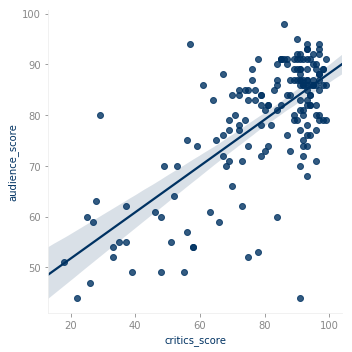

In [41]:
sns.lmplot(data=movies, x="critics_score", y="audience_score")

I guess we see that usually the scores don't differ too much actually for these types of movies, though there clearly are some bigger debates when one side really loves a movie.

/home/rucy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


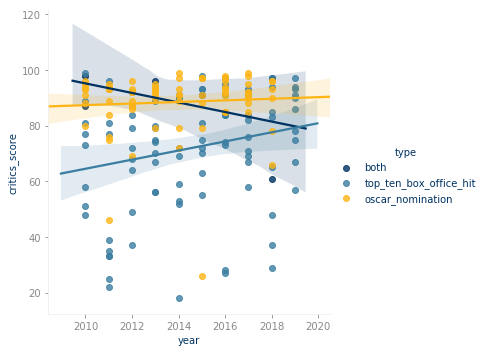

In [42]:
sns.lmplot(data=movies, x="year", y="critics_score", hue="type")

Interestingly, we see here that critics seem to be liking the movies made for mass audiences more over the past 10 years.

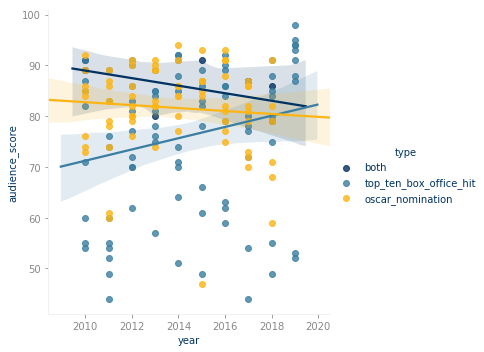

In [43]:
sns.lmplot(data=movies, x="year", y="audience_score", hue="type")

Also interestingly, we see that audiences seem to actually be liking the box office hit films more and more, while disliking the Academy Award nominated films.